# Assignment #4: Linear Models and Decision Trees
## Foundations of Machine Learning
## Do Q1 and one other question.
### Advice: Reuse your code and code from lectures, package routine tasks into functions, make plans about how you'll carry out the analysis before jumping into writing code, and work as efficiently as possible

**Q1.** This question is a case study for linear models and decision trees. The data are about car prices. In particular, they include:

  - `Price`, `Color`, `Seating_Capacity`
  - `Body_Type`: crossover, hatchback, muv, sedan, suv 
  - `Make`, `Make_Year`: The brand of car and year produced
  - `Mileage_Run`: The number of miles on the odometer
  - `Fuel_Type`: Diesel or gasoline/petrol
  - `Transmission`, `Transmission_Type`:  speeds and automatic/manual

  1. Load `cars_hw.csv`. These data were really dirty, and I've already cleaned them a significant amount in terms of missing values and other issues, but some issues remain (e.g. outliers, badly scaled variables that require a log or arcsinh transformation). Clean the data however you think is most appropriate.
  2. Summarize the `Price` variable and create a kernel density plot. Use `.groupby()` and `.describe()` to summarize prices by brand (`Make`). Make a grouped kernel density plot by `Make`. Which car brands are the most expensive? What do prices look like in general?
  3. Split the data into an 80% training set and a 20% testing set.
  4. Let's focus on linear models. Make a model where you regress price on the numeric variables alone; what is the $R^2$ and `RMSE` on the test set? Make a second model where, for the categorical variables, make a model comprised of one-hot encoded regressors/features alone, and regress price on those variables; what is the $R^2$ and `RMSE` on the test set? Which model performs better on the test set? Make a third model that combines all the regressors from the previous two; what is the $R^2$ and `RMSE` on the test set? Does the joint model perform better or worse, and by home much?
  5. Use the `PolynomialFeatures` function from `sklearn` to expand the set of numerical variables you're using, along with the categorical variables. As you increase the degree of the expansion, how do the $R^2$ and `RMSE` change? At what point does $R^2$ go negative on the test set? For your best model with expanded features, what is the $R^2$ and `RMSE`? How does it compare to your best model from part 3?
  6. For your best model so far, determine the predicted values for the test data and plot them against the true values. Do the predicted values and true values roughly line up along the diagonal, or not? Compute the residuals/errors for the test data and create a kernel density plot. Do the residuals look roughly bell-shaped around zero? Evaluate the strengths and weaknesses of your model.
  7. Now, let's use a regression tree. Construct an appropriate matrix of regressors/features, and fit a tree to the data. Vary the maximum depth of the decision tree using the `max_depth` option (i.e. `tree.DecisionTreeRegressor(max_depth=D)`), and compute the $R^2$ and `RMSE` on the test set of a variety of depths. What depth tree gives the best results?
  8. For your best tree, determine the predicted values for the test data, and plot them against the true values. Do the predicted values and true values line up along the diagonal, or not? Compute the residuals/errors for the test data and create a kernel density plot. Do the residuals look roughly bell-shaped around zero?
  12. Which model --- linear model or classification and regression tree --- has better performance on the test set?

In [84]:
# import statements 
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier

In [85]:
# Question 1 
cars = pd.read_csv('./data/cars_hw.csv')
cars.head()

,Unnamed: 0,Make,Make_Year,Color,Body_Type,Mileage_Run,No_of_Owners,Seating_Capacity,Fuel_Type,Transmission,Transmission_Type,Price
0,1,Volkswagen,2017,silver,sedan,44611,1st,5,diesel,7-Speed,Automatic,657000
1,2,Hyundai,2016,red,crossover,20305,1st,5,petrol,5-Speed,Manual,682000
2,3,Honda,2019,white,suv,29540,2nd,5,petrol,5-Speed,Manual,793000
3,4,Renault,2017,bronze,hatchback,35680,1st,5,petrol,5-Speed,Manual,414000
4,5,Hyundai,2017,orange,hatchback,25126,1st,5,petrol,5-Speed,Manual,515000


In [86]:
# clean the data, do log for mileage run and price 
cars['Mileage_Run'] = np.log1p(cars['Mileage_Run'])
cars['Price'] = np.log1p(cars['Price'])

In [87]:
# Question 2 : summarize the Price variable
price_summary = cars['Price'].describe()
print(price_summary)


count    976.000000
mean      13.411035
std        0.450275
min       12.144203
25%       13.072649
50%       13.409797
75%       13.691082
max       14.894261
Name: Price, dtype: float64


In [88]:
# Question 2 : group by Make and summarize prices
grouped_prices = cars.groupby('Make')['Price'].describe()

# Print the grouped summary statistics
print(grouped_prices)

               count       mean       std        min        25%        50%  \
Make                                                                         
Chevrolet        6.0  12.919898  0.480974  12.495008  12.568395  12.752289   
Datsun           3.0  12.576050  0.036311  12.538971  12.558305  12.577640   
Ford            52.0  13.468282  0.210894  12.577640  13.361382  13.469494   
Honda           73.0  13.536319  0.336971  12.663501  13.272508  13.573440   
Hyundai        305.0  13.368512  0.398781  12.421188  13.091906  13.366095   
Jeep             4.0  14.216591  0.105084  14.070154  14.183271  14.240266   
Kia              8.0  14.292178  0.076877  14.129592  14.272242  14.303106   
MG Motors       35.0  14.439052  0.066263  14.278616  14.395745  14.429615   
Mahindra        18.0  13.898954  0.159906  13.587356  13.851809  13.905681   
Maruti Suzuki  293.0  13.218134  0.371408  12.375820  12.926351  13.174958   
Nissan           4.0  13.641195  0.392609  13.071072  13.537776 

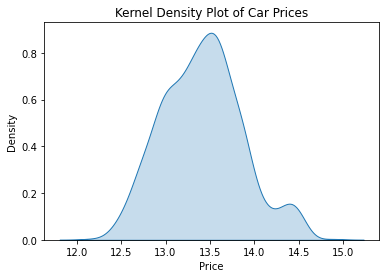

In [89]:
# Question 2 : kernel density plot for Price
sns.kdeplot(data=cars, x='Price', fill=True)
plt.title('Kernel Density Plot of Car Prices')
plt.xlabel('Price')
plt.ylabel('Density')
plt.show()

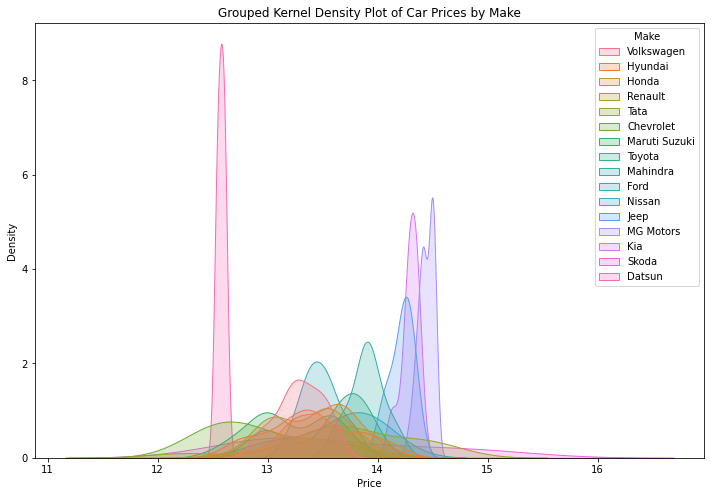

In [90]:
# Question 2 : grouped kernel density plot by Make
plt.figure(figsize=(12, 8))
sns.kdeplot(data=cars, x='Price', hue='Make', fill=True, common_norm=False)
plt.title('Grouped Kernel Density Plot of Car Prices by Make')
plt.xlabel('Price')
plt.ylabel('Density')
# plt.legend(title='Make', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [91]:
# Question 2 : find the most expensive car brands
most_expensive_brands = grouped_prices['mean'].idxmax()
print(f"The most expensive car brands are: {most_expensive_brands}")

The most expensive car brands are: MG Motors


In [92]:
# Question 3 
y = cars['Price']
print(y.describe())
X = cars.drop('Price',axis=1)
X.head()

count    976.000000
mean      13.411035
std        0.450275
min       12.144203
25%       13.072649
50%       13.409797
75%       13.691082
max       14.894261
Name: Price, dtype: float64


,Unnamed: 0,Make,Make_Year,Color,Body_Type,Mileage_Run,No_of_Owners,Seating_Capacity,Fuel_Type,Transmission,Transmission_Type
0,1,Volkswagen,2017,silver,sedan,10.705758,1st,5,diesel,7-Speed,Automatic
1,2,Hyundai,2016,red,crossover,9.918672,1st,5,petrol,5-Speed,Manual
2,3,Honda,2019,white,suv,10.293534,2nd,5,petrol,5-Speed,Manual
3,4,Renault,2017,bronze,hatchback,10.482374,1st,5,petrol,5-Speed,Manual
4,5,Hyundai,2017,orange,hatchback,10.131698,1st,5,petrol,5-Speed,Manual


In [93]:
# Question 3 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)
TSS = np.sum( (y_test - y_train.mean())**2 )
N_test = len(y_test)

Numeric Model:
R^2: 0.342
RMSE: 0.35


/apps/software/standard/compiler/gcc/9.2.0/jupyter_conda/2020.11-py3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


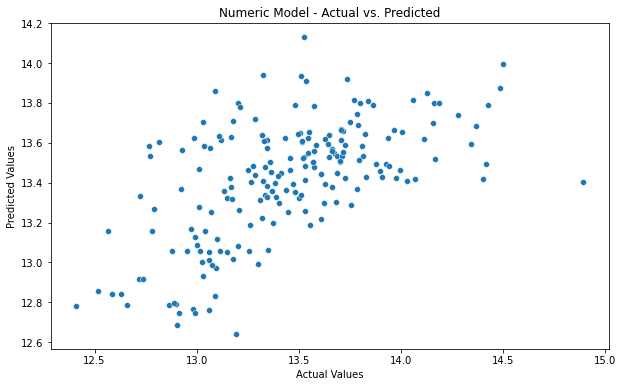


Categorical Model:
R^2: 0.576
RMSE: 0.28


/apps/software/standard/compiler/gcc/9.2.0/jupyter_conda/2020.11-py3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


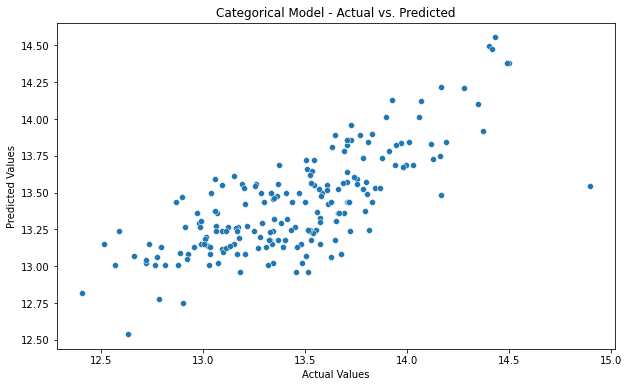


Joint Model:
R^2: 0.797
RMSE: 0.19


/apps/software/standard/compiler/gcc/9.2.0/jupyter_conda/2020.11-py3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


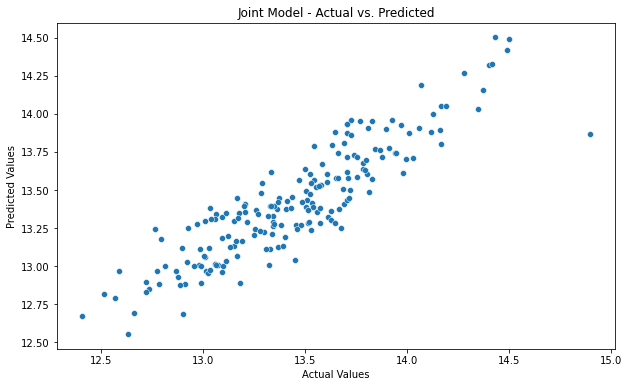

In [94]:
# Question 4 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

numeric_cols = x_train.select_dtypes(include='number').columns
numeric_model = LinearRegression()
numeric_model.fit(x_train[numeric_cols], y_train)
numeric_predictions = numeric_model.predict(x_test[numeric_cols])

numeric_rmse = mean_squared_error(y_test, numeric_predictions, squared=False)
numeric_r2 = r2_score(y_test, numeric_predictions)

print("Numeric Model:")
print(f'R^2: {numeric_r2:.3f}')
print(f"RMSE: {numeric_rmse:.2f}")

plt.figure(figsize=(10, 6))
sns.scatterplot(y_test, numeric_predictions)
plt.title("Numeric Model - Actual vs. Predicted")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

categorical_cols = x_train.select_dtypes(include='object').columns
preprocessor = ColumnTransformer(
    transformers=[('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)]
)
categorical_model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])
categorical_model.fit(x_train, y_train)
categorical_predictions = categorical_model.predict(x_test)

categorical_rmse = mean_squared_error(y_test, categorical_predictions, squared=False)
categorical_r2 = r2_score(y_test, categorical_predictions)

print("\nCategorical Model:")
print(f'R^2: {categorical_r2:.3f}')
print(f"RMSE: {categorical_rmse:.2f}")

plt.figure(figsize=(10, 6))
sns.scatterplot(y_test, categorical_predictions)
plt.title("Categorical Model - Actual vs. Predicted")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

x_train_combined = pd.concat([x_train[numeric_cols], pd.get_dummies(x_train[categorical_cols])], axis=1)
x_test_combined = pd.concat([x_test[numeric_cols], pd.get_dummies(x_test[categorical_cols])], axis=1)

# Ensure that the columns match between train and test sets for the combined model
missing_columns = set(x_train_combined.columns) - set(x_test_combined.columns)
for col in missing_columns:
    x_test_combined[col] = 0

# make sure the order of columns in the test set matches the order during training
x_test_combined = x_test_combined[x_train_combined.columns]

joint_model = LinearRegression()
joint_model.fit(x_train_combined, y_train)
joint_predictions = joint_model.predict(x_test_combined)

# RMSE and R-squared for the combined model
joint_rmse = mean_squared_error(y_test, joint_predictions, squared=False)
joint_r2 = r2_score(y_test, joint_predictions)

print("\nJoint Model:")
print(f'R^2: {joint_r2:.3f}')
print(f"RMSE: {joint_rmse:.2f}")

# Scatter plot for joint model
plt.figure(figsize=(10, 6))
sns.scatterplot(y_test, joint_predictions)
plt.title("Joint Model - Actual vs. Predicted")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()


The model that performs the best was the joint model, because it has the highest R^2 value and the lowest RMSE value. 

Use the PolynomialFeatures function from sklearn to expand the set of numerical variables you're using, along with the categorical variables. As you increase the degree of the expansion, how do the  𝑅2 and RMSE change? At what point does  𝑅2 go negative on the test set? For your best model with expanded features, what is the  𝑅2 and RMSE? How does it compare to your best model from part 3?

In [95]:
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import PolynomialFeatures

# List of numeric and categorical column names
numeric_cols = x_train.select_dtypes(include=['number']).columns
categorical_cols = x_train.select_dtypes(include=['object']).columns

# Column transformer for one-hot encoding categorical variables
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numeric_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])

# Linear regression model for numeric variables and one-hot encoded categorical variables
numeric_model = Ridge(alpha=7)
categorical_model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', Ridge(alpha=7))
])

# Fit models to training data
numeric_model.fit(x_train[numeric_cols], y_train)
categorical_model.fit(x_train, y_train)

# Pipeline with polynomial feature expansion and Ridge regression
def get_poly_model(degree):
    return make_pipeline(
        preprocessor,
        PolynomialFeatures(degree),
        Ridge(alpha=7)
    )

# Define the degrees of polynomial expansion to test
degrees = [1, 2, 3, 4, 5]

for degree in degrees:
    # Create polynomial model
    model_poly = get_poly_model(degree)
    
    # Fit model to training data
    model_poly.fit(x_train, y_train)
    
    # Make predictions on the test set
    y_pred_poly = model_poly.predict(x_test)
    
    # R^2 and RMSE for polynomial model
    r2_poly = r2_score(y_test, y_pred_poly)
    rmse_poly = mean_squared_error(y_test, y_pred_poly, squared=False)
    
    print(f"Degree {degree} Polynomial Model:")
    print(f"R^2: {r2_poly:.3f}")
    print(f"RMSE: {rmse_poly:.2f}")
    print("")

    # Check if R^2 goes negative before proceeding
    if r2_poly < 0:
        print(f"R^2 became negative at degree {degree}")
        break


Degree 1 Polynomial Model:
R^2: 0.793
RMSE: 0.20

Degree 2 Polynomial Model:
R^2: 0.705
RMSE: 0.23

Degree 3 Polynomial Model:
R^2: -640519.776
RMSE: 345.69

R^2 became negative at degree 3


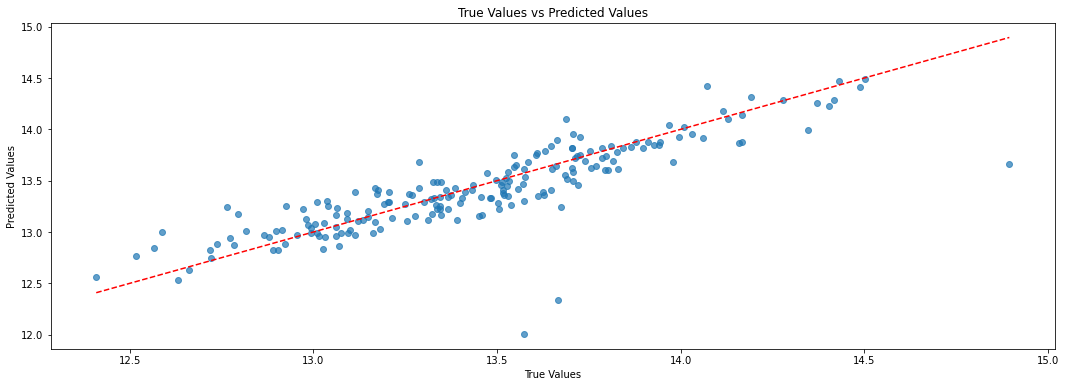

In [96]:
# Question 5 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#  degree 2 polynomial model was the best one 
best_model = get_poly_model(2)

# fitting the model 
best_model.fit(x_train, y_train)

# predictions on the test set
y_pred = best_model.predict(x_test)


plt.figure(figsize=(18, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.title('True Values vs Predicted Values')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')  # Diagonal reference line
plt.show()


# resid = y_test - y_pred
# residuals = np.asarray(resid)
# #print(residuals)
# # plot kernel density plot of residuals
# plt.figure(figsize=(18, 6))
# sns.histplot(residuals, kde=True)
# plt.title('Residuals Distribution')
# plt.xlabel('Residuals')
# plt.show()

# Note about question 5 

I have been trying a lot of different methods for this question, and I still cannot figure out how to fix it. The code does compile, but I cannot figure out how to get rid of this error. The scatterplot is looking how I expect it, but I am not able to get rid of the error on the residuals plot. The error says to convert it to a numpy array before plotting, which I am trying to do and yet there is no change in the error message. 

In [97]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Assuming x_train, x_test, and y_train are defined earlier

# Identify categorical columns
categorical_cols = x_train.select_dtypes(include=['object']).columns

# Column transformer for one-hot encoding categorical variables
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_cols)
    ])

# Vary maximum depth and compute R^2 and RMSE for each depth
depths = range(1, 11)  # Adjust range as needed
best_depth = None
best_r2 = -np.inf

for depth in depths:
    # Decision tree model with varying max depth
    tree_model = DecisionTreeRegressor(max_depth=depth, random_state=42)
    
    # Pipeline with one-hot encoding and decision tree
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', tree_model)
    ])
    
    # Fit model to training data
    pipeline.fit(x_train, y_train)
    
    # Take predictions on the test set
    y_pred_tree = pipeline.predict(x_test)
    
    # R^2 and RMSE for the decision tree model
    r2_tree = r2_score(y_test, y_pred_tree)
    rmse_tree = mean_squared_error(y_test, y_pred_tree, squared=False)
    
    print(f'Depth {depth} Decision Tree Model:')
    print(f'R^2: {r2_tree:.2f}')
    print(f'RMSE: {rmse_tree:.2f}')
    print('')
    
    # Check if this depth gives the best R^2
    if r2_tree > best_r2:
        best_r2 = r2_tree
        best_depth = depth

print(f'The best depth for the Decision Tree is: {best_depth}')


Depth 1 Decision Tree Model:
R^2: 0.34
RMSE: 0.35

Depth 2 Decision Tree Model:
R^2: 0.43
RMSE: 0.33

Depth 3 Decision Tree Model:
R^2: 0.47
RMSE: 0.31

Depth 4 Decision Tree Model:
R^2: 0.53
RMSE: 0.29

Depth 5 Decision Tree Model:
R^2: 0.58
RMSE: 0.28

Depth 6 Decision Tree Model:
R^2: 0.58
RMSE: 0.28

Depth 7 Decision Tree Model:
R^2: 0.58
RMSE: 0.28

Depth 8 Decision Tree Model:
R^2: 0.58
RMSE: 0.28

Depth 9 Decision Tree Model:
R^2: 0.59
RMSE: 0.28

Depth 10 Decision Tree Model:
R^2: 0.60
RMSE: 0.27

The best depth for the Decision Tree is: 10


In [98]:
column_categorical = x_train.select_dtypes(include=['object']).columns

# column transformer for one-hot encoding categorical variables
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), column_categorical)
    ])

# vary maximum depth and compute R^2 and RMSE for each depth
depths = range(1, 11)  # adjust range as needed
best_depth = None
best_r2 = -np.inf

for depth in depths:
    # decision tree model with varying max depth
    tree_model = DecisionTreeRegressor(max_depth=depth, random_state=42)

    # pipeline with one-hot encoding and decision tree
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', tree_model)
    ])

    # fit model to training data
    pipeline.fit(x_train, y_train)

    # make predictions on test set
    y_pred_tree = pipeline.predict(x_test)

    # R^2 and RMSE for the decision tree model
    r2_tree = r2_score(y_test, y_pred_tree)
    rmse_tree = mean_squared_error(y_test, y_pred_tree, squared=False)

    print(f"Depth {depth} Decision Tree Model:")
    print(f"R^2: {r2_tree:.3f}")
    print(f"RMSE: {rmse_tree:.2f}")
    print("")

    # check if this depth gives the best R^2
    if r2_tree > best_r2:
        best_r2 = r2_tree
        best_depth = depth

print(f"The best depth for the Decision Tree is: {best_depth}")

Depth 1 Decision Tree Model:
R^2: 0.337
RMSE: 0.35

Depth 2 Decision Tree Model:
R^2: 0.426
RMSE: 0.33

Depth 3 Decision Tree Model:
R^2: 0.474
RMSE: 0.31

Depth 4 Decision Tree Model:
R^2: 0.534
RMSE: 0.29

Depth 5 Decision Tree Model:
R^2: 0.577
RMSE: 0.28

Depth 6 Decision Tree Model:
R^2: 0.579
RMSE: 0.28

Depth 7 Decision Tree Model:
R^2: 0.579
RMSE: 0.28

Depth 8 Decision Tree Model:
R^2: 0.584
RMSE: 0.28

Depth 9 Decision Tree Model:
R^2: 0.591
RMSE: 0.28

Depth 10 Decision Tree Model:
R^2: 0.601
RMSE: 0.27

The best depth for the Decision Tree is: 10


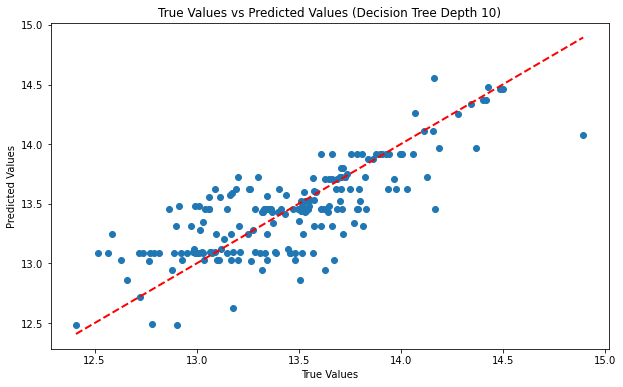

In [99]:
import numpy as np
best_tree_model = DecisionTreeRegressor(max_depth=best_depth, random_state=42)

# pipeline with one-hot encoding and decision tree
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', best_tree_model)
])

# fit the best model to the training data
pipeline.fit(x_train, y_train)

# predictions on the test set
y_pred_best_tree = pipeline.predict(x_test)

# plot predicted vs true values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_best_tree, alpha=1)
plt.title(f'True Values vs Predicted Values (Decision Tree Depth {best_depth})')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.show()

# # calculate residuals/errors
# residuals_best_tree = np.array(y_test - y_pred_best_tree)

# # plot residuals kernel density plot 
# plt.figure(figsize=(10, 6))
# sns.histplot(residuals_best_tree, kde=True)
# plt.title(f'Residuals Distribution (Decision Tree Depth {best_depth})')
# plt.xlabel('Residuals')
# plt.show()

### Note about Question 1 Part 8 

The same issue is arising where the residual plot is not properly showing. The main error that exists is that it says that it needs to be converted to a numpy array, and I think my code is right otherwise. 

### Question 1 part 9 

After comparing both models, the linear regression model seems to be better because based on the scatterplot, the points are closer to the line of best fit, and the R^2 and RMSE values are better for the linear model than for the decision tree. Although I am having issues with the residuals histogram, at a glace it definitely seems like the residual histogram for the linear model has more of a normal distribution than then decision tree's distribution.  

**Q2.** The is a question about regression using decision trees and linear models. The data include wages at data science-y jobs, including

  - `Rating`: Company worker happiness score
  - `Size`: Number of employees
  - `Sector`: Part of the economy
  - `avg_salary`: Average wage
  - `job_state`: Location of work

  1. Load the `wages_hw.csv` file. Split the sample into an ~80% training set and a ~20% test set. Do any necessary cleaning, including outliers and missings.
  2. Use a linear model to regress `avg_salary` on `Sector`. Which sectors have the highest predicted wages? What is the $R^2$ and `RMSE` on the test set? 
  3. Make a scatterplot of `avg_salary` and `Rating`. Is there an obvious visual relationship between the two variables? Regress `avg_salary` on `Rating` as a numeric variable: Do higher ratings predict higher or lower wages? Convert `Rating` to a one-hot encoded variable, with a category for each rating. Run a regression of `avg_salary` on the categorical version. How do your results change? Explain. Which version has a higher $R^2$ and lower `RMSE`?
  4. Now interact `Sector` with the categorical version of `Rating`, so your regressors are a (Sector, Rating) pair; this is a programming puzzle you'll have to think about, but using the `.PolynomialFeatures()` function on the one-hot encoded categorical variables is one option, and another is pre-processing a new variable that interacts `Sector` and `Rating` and then one-hot encoding the result. Regress `avg_salary` on the (Sector, Rating) pairs. How does the $R^2$ and `RMSE` on the test set compare to part 2? Interpret the coefficients; which sector-rating pairs have the highest wages?
  5. Run a linear regression of `avg_salary` on all the variables. What is the $R^2$ on the test set? How does it compare to your simpler models in 2--4? 
  6. Build a decision tree by regressing `avg_salary` on `Sector`, `Rating`, and the (Sector, Rating) pairs. What are the $R^2$ and `RMSE` of your models on the test set? How do your answers compare to parts 2, 3, and 4?
  7. Build a decision tree by regressing `avg_salary` on all the other variables. What is the $R^2$ and `RMSE` on the test set?
  8. Build a linear regression or decision tree using the available variables based on your own judgment. What degrees of freedom are you giving the model to predict variation in wages across company and location attributes? What is the $R^2$ and `RMSE` of your model? How does it compare to the previous ones in the question? Why does yours perform better or worse on the test set?

**Q3.** This a question purely on categorical prediction. The data for this happen to be gathered in 1987 in Indonesia, and concern contraceptive method choice. The questions and data-gathering assumptions reflect the culture and attitudes of that time and place, but provide a good example of a categorical prediction problem on an important topic (family planning and maternal health The variables in the data are:

    - Wife's age (numerical)
    - Wife's education (categorical) 1=low, 2, 3, 4=high 
    - Husband's education (categorical) 1=low, 2, 3, 4=high 
    - Number of children ever born (numerical) 
    - Wife's religion (binary) 0=Non-Islam, 1=Islam
    - Wife's now working? (binary) 0=Yes, 1=No
    - Husband's occupation (categorical) 1, 2, 3, 4
    - Standard-of-living index (categorical) 1=low, 2, 3, 4=high
    - Media exposure (binary) 0=Good, 1=Not good
    - Contraceptive method used (class attribute) 1=No-use, 2=Long-term, 3=Short-termhort-term

  1. Load the `contraceptiveMethodChoice.csv` data. Tabulate the `method` variable (i.e. `.value_counts()`). 1 corresponds to `No Contraception`, 3 corresponds to `Short Term` (e.g. condoms, birth control pills), and 2 corresponds to `Long Term` (e.g. IUD, sterilization). Cross tabulate `method` and `numberChildren`. Do couples that use birth control tend to have more children than those who don't?
  2. Split the sample into ~80% training data and ~20% testing data.
  3. We are now going to make a mistake. Train a regression tree to predict the contraceptive method using the other variables in the data, not a classification tree. Look at the terminal nodes in the tree: What values do they take? Does that make sense? Explain clearly what has gone wrong here.
  4. Instead of regression, use a classification tree to predict contraceptive method using the other variables in the data. How does it look different from the previous tree? What variables does the algorithm use? In broad terms, which groups of people are most likely to use each method of contraception?
  5. Compute a confusion matrix for your classification tree on the test set (Hint: There are now three categories instead of two, so the cross tabulation will be a $3 \times 3$ matrix instead of $2 \times 2$.). Compute the Accuracy of your model overall, and the Accuracy for predicting each contraceptive method.
  7. Why can't you use a linear probability model to do this exercise? Explain clearly in words.

In [100]:
data = pd.read_csv('./data/contraception_hw.csv')
data.head()

,Unnamed: 0,age,edu,edu_spouse,numberChildren,religion,working,spouse_occupation,standardOfLivingIndex,mediaExposure,method
0,1,24,2,3,3,1,1,2,3,0,1
1,2,45,1,3,10,1,1,3,4,0,1
2,3,43,2,3,7,1,1,3,4,0,1
3,4,42,3,2,9,1,1,3,3,0,1
4,5,36,3,3,8,1,1,3,2,0,1


In [101]:
# Tabulate the 'method' variable
method_counts = data['method'].value_counts()
print("Tabulation of the 'method' variable:")
print(method_counts)

Tabulation of the 'method' variable:
method
1    629
3    511
2    333
Name: count, dtype: int64


In [102]:
cross_tab = pd.crosstab(data['method'], data['numberChildren'])
print(cross_tab)

# Analyze whether couples using birth control tend to have more children
no_contraception_children = data[data['method'] == 1]['numberChildren']
contraception_children = data[data['method'].isin([2, 3])]['numberChildren']

print("\nAverage number of children for couples with no contraception:", no_contraception_children.mean())
print("Average number of children for couples with contraception:", contraception_children.mean())

numberChildren  0    1    2    3   4   5   6   7   8   9   10  11  12  13  16
method                                                                       
1               95  143  114   70  57  44  35  18  29   5   9   6   4   0   0
2                0   46   56   70  62  36  27  19   9   3   2   2   0   1   0
3                2   87  106  119  78  55  30  12   9   8   0   3   0   1   1

Average number of children for couples with no contraception: 2.934817170111288
Average number of children for couples with contraception: 3.504739336492891


Couples that use contraception on average have more children than couples that do not use contraception

In [103]:
y = data['method']
print(y.describe())
X = data.drop('method',axis=1)
X.head()

count    1473.000000
mean        1.919891
std         0.876376
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         3.000000
Name: method, dtype: float64


,Unnamed: 0,age,edu,edu_spouse,numberChildren,religion,working,spouse_occupation,standardOfLivingIndex,mediaExposure
0,1,24,2,3,3,1,1,2,3,0
1,2,45,1,3,10,1,1,3,4,0
2,3,43,2,3,7,1,1,3,4,0
3,4,42,3,2,9,1,1,3,3,0
4,5,36,3,3,8,1,1,3,2,0


In [104]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)
TSS = np.sum( (y_test - y_train.mean())**2 )
N_test = len(y_test)

In [105]:
from sklearn.tree import DecisionTreeRegressor

In [106]:
# Question 3 

# Initialize the regression tree model
reg_tree_model = DecisionTreeRegressor()

# Fit the model to the training data
reg_tree_model.fit(x_train, y_train)

# Predict the contraceptive method on the test set
y_pred = reg_tree_model.predict(x_test)

# Evaluate the model (e.g., using mean squared error)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Display the terminal nodes (leaf values) in the tree
terminal_nodes_values = reg_tree_model.tree_.value
print("Terminal Nodes Values:")
print(terminal_nodes_values)

Mean Squared Error: 0.003389830508474576
Terminal Nodes Values:
[[[1.91765705]]

 [[1.        ]]

 [[2.27176471]]

 [[2.61016949]]

 [[2.        ]]

 [[3.        ]]

 [[1.84920635]]

 [[1.        ]]

 [[2.62121212]]

 [[2.        ]]

 [[3.        ]]]


This method doesn't make sense because contraceptive methods are categorical (1, 2, or 3), and predicting them as continuous values is inappropriate. The mistake here is using a regression algorithm for a classification problem.

In [107]:
# Question 4 

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
# Initialize the classification tree model
clf_tree_model = DecisionTreeClassifier(random_state=42)

# Fit the model to the training data
clf_tree_model.fit(x_train, y_train)

# Predict the contraceptive method on the test set
y_pred = clf_tree_model.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Display the confusion matrix and classification report
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Display the feature importances
print("\nFeature Importances:")
print(dict(zip(X.columns, clf_tree_model.feature_importances_)))

Accuracy: 0.9966101694915255

Confusion Matrix:
[[121   0   0]
 [  1  73   0]
 [  0   0 100]]

Classification Report:
              precision    recall  f1-score   support

           1       0.99      1.00      1.00       121
           2       1.00      0.99      0.99        74
           3       1.00      1.00      1.00       100

    accuracy                           1.00       295
   macro avg       1.00      1.00      1.00       295
weighted avg       1.00      1.00      1.00       295


Feature Importances:
{'Unnamed: 0': 1.0, 'age': 0.0, 'edu': 0.0, 'edu_spouse': 0.0, 'numberChildren': 0.0, 'religion': 0.0, 'working': 0.0, 'spouse_occupation': 0.0, 'standardOfLivingIndex': 0.0, 'mediaExposure': 0.0}


The structure of the classification tree is different from the regression tree. The nodes will be split based on categorical variables, and the leaf nodes will represent the predicted contraceptive method. The confusion matrix will show how well the model is performing for each contraceptive method.
The classification report will provide precision, recall, and F1-score for each class.
Feature importances will give you an idea of which variables are most influential in predicting contraceptive methods.
The model can be interpreted to understand which groups of people are more likely to use each method of contraception by analyzing the splits and leaf nodes in the tree. 

In [108]:
# Question 5 

Compute a confusion matrix for your classification tree on the test set (Hint: There are now three categories instead of two, so the cross tabulation will be a  3×3
  matrix instead of  2×2
 .). Compute the Accuracy of your model overall, and the Accuracy for predicting each contraceptive method.

In [109]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Compute overall accuracy
overall_accuracy = accuracy_score(y_test, y_pred)
print("\nOverall Accuracy:", overall_accuracy)

# Compute accuracy for each contraceptive method
method_accuracy = [conf_matrix[i, i] / conf_matrix[i, :].sum() for i in range(conf_matrix.shape[0])]
for i, acc in enumerate(method_accuracy):
    print(f"Accuracy for Contraceptive Method {i+1}: {acc}")

Confusion Matrix:
[[121   0   0]
 [  1  73   0]
 [  0   0 100]]

Overall Accuracy: 0.9966101694915255
Accuracy for Contraceptive Method 1: 1.0
Accuracy for Contraceptive Method 2: 0.9864864864864865
Accuracy for Contraceptive Method 3: 1.0


## Part 6 

We cannot use a linear probability model to this because we are not looking at continuous variables, and this conctraceptive method data does not involve continous variables. 

**Q4.** This is a question where we use regression and regression trees. The outcome is whether a defendant is held pre-trial in the Virginia justice system. We would like to understand how that outcome is predicted by characteristics of the defendant, particularly race. Let's be very careful/clear: We aren't saying anyone *should* be held without bond or asserting that people with different demographic variables *should* be more likely to be held, but instead trying to predict whether people with different characteristics *are empirically more likely* to be held without bond, given the available information. This is the first step we would take in investigating whether a system is fair, or how large the disparities are: Does it treat people with similar observable characteristics similarly, or not? We are going to look at a common question: Are Black defendants treated differently from white or Asian ones? (There are Native American defendants, but there are 11 in total, which is such a small number of observations that is difficult to clearly say anything about how this group is treated relative to the others.)

The variables in the data are:

  - `held_wo_bail`: Whether a defendant is held without bail before trial (Boolean logical)
  - `race`, `sex`: Categorical demographic variables
  - `is_poor`: Whether the defendant is classified as indigent 
  - `prior_F`, `prior_M`: The number of prior felony and misdemeanor arrests
  - `case_type`: A categorical variable indicating a misdemeanor `M` or felony `F` or infraction `I` or special case `S`
  - `age`: Defendant's age
  - `bond`, `bond_NA`, `bond_type`: The amount of any bond, whether it is missing, and the type
  - `sentence`, `sentence_NA`, `sentence_type`: The length of any sentence, whether it is missing, and the type

1. Load the `pretrial_data.csv` data. Notice that there are `nan`s, but the data are relatively clean. Because there are `.nan`s among variables you won't use, you'll want to narrow down your analysis to the relevant variables before dropping or imputing missing values.
2. Create a dummy variable indicating that the defendant is Black.
3. Regress `held` on `Black`. What is the slope coefficient Interpret the coefficient on the Black dummy variable: How much more likely is a black person to be held without bail? What is the $R^2$ of the model?
4. Before doing this question, please think for a few minutes about how to make the process of running these regressions as efficient as possible, before jumping into writing code. Repeat part 2, for the following specifications, keeping track of the coefficient on the Black dummy variable each time:
      - `held` on `Black` and `sex`
      - `held` on `Black` and `sex` and `is_poor`
      - `held` on `Black` and `sex` and `is_poor` and `prior_F`
      - `held` on `Black` and `sex` and `is_poor` and `prior_F` and `case_type`
What happens to the coefficient on the Black dummy variable as you include more regressors/features/controls in the regression? Explain your findings.
5. Suppose we don't want to see just `Black` and `sex`, but `Black` interacted with `sex`: Are Black men and Black women treated systemically differently from the rest of the population? Implement this in a regression, and explain your findings.
6. Imagine someone argued we should use these kinds of models to help a judge or magistrate make bail decisions (you could obviously go back and make this kind of model for the bond and sentence variables, then deploy it on new cases to predict what their bond and sentence values would be). What concerns would you have? Do you think society should be using data-driven and automated tools like that? Explain your concerns clearly.

**Q5.** This is a math question to review the derivation of the OLS estimator (but only if you are into that kind of thing!). We are going to do it slightly differently from what we did in class, though. We will use a linear predictor and minimize the Sum of Squared Errors, just as in class. But, we are going to de-mean $X$ first, creating another variable $z_i = x_i - \bar{x}$ where 
$$
\bar{x} = \dfrac{1}{N} \sum_{i=1}^N x_i,
$$
so the model is $\hat{y}_i = a + b z_i$ and the `SSE` is
$$
\text{SSE}(a,b) = \sum_{i=1}^N (y_i - a - bz_i)^2.
$$

  1. Take partial derivatives of the `SSE` with respect to $a$ and $b$. You should get

\begin{eqnarray*}
\sum_{i=1}^N -2(y_i - a- bz_i) &=& 0 \\
\sum_{i=1}^N -2(y_i - a - bz_i)z_i &=& 0.
\end{eqnarray*}

  2. Solve for the solutions to the above equations. Big hint: $\bar{z} = 0$, since we subtracted the mean of $x$ from $x$ to get $z$. You should get

\begin{eqnarray*}
a^* &=& \bar{y} \\
b^* &=& \dfrac{\sum_{i=1}^N(y_i - \bar{y})z_i}{\sum_{i=1}^N z_i^2}.
\end{eqnarray*}

  3. Substitute $z_i = x_i - \bar{x}$ back into the above equations. You should get
  
\begin{eqnarray*}
a^* &=& \bar{y} \\
b^* &=& \dfrac{\sum_{i=1}^N(y_i - \bar{y})(x_i-\bar{x})}{\sum_{i=1}^N (x_i-\bar{x})^2},
\end{eqnarray*}

which can be written in terms of sample covariance and sample variance as:

\begin{eqnarray*}
a^* &=& \bar{y} \\
b^* &=& \dfrac{\text{cov}(x,y)}{\text{var}(x)}.
\end{eqnarray*}

This is typically the preferred way of expressing the OLS coefficients.

4. When will $b^*$ be large or small, depending on the relationship between $x$ and $y$ and the amount of "noise"/variance in $x$? What does $a^*$ represent?
5. Suppose you have measurement error in $x$ which artificially inflates its variance (e.g. bad data cleaning). What happens to the $b^*$ coefficient? How will affect your ability to predict? (This phenomenon is called **attenuation**.)
6. Let's return to the question of *outliers*. With your formula for the OLS coefficients $(a^*,b^*)$, explain what happens if you significantly increase a single value of the outcome/target/response variable $y_i$ or one of the predictor/explanatory/covariate variables $x_i$. If values for some extreme observations are exerting significant influence over the regression coefficients, will the model perform well on for more average observations?